Author-Anisha
Created a predictive model with a sample from a database of 13 million donors, managing to represent donors and non- donors equally. Maximized average donations and response rates while taking into account mailing costs and personalized
incentives to maximize net profit.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pylab as plt
from dmba import classificationSummary
from dmba import gainsChart,liftChart

In [12]:
# Load the data
df = pd.read_csv(r"C:\Users\anish\Downloads\Fundraising.csv")
df.head()



,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


In [13]:
# drop Target_D
df=df.drop('TARGET_D', axis=1)
df

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B
0,1,17,0,1,0,0,1,1,5,1,...,703,1,74,102.0,6.0,5.0,29,3,4.857143,1
1,2,25,1,0,0,0,1,1,1,0,...,463,4,46,94.0,12.0,12.0,34,6,9.400000,1
2,3,29,0,0,0,1,0,2,5,1,...,376,13,32,30.0,10.0,5.0,29,7,4.285714,1
3,4,38,0,0,0,1,1,1,3,0,...,546,4,94,177.0,10.0,8.0,30,3,7.080000,0
4,5,40,0,1,0,0,1,1,4,0,...,432,7,20,23.0,11.0,11.0,30,6,7.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,3116,23256,0,0,0,1,1,1,4,0,...,372,11,23,30.0,16.0,4.0,29,5,7.500000,0
3116,3117,23258,0,1,0,0,0,1,2,0,...,400,0,29,53.0,30.0,30.0,37,9,26.500000,1
3117,3118,23261,0,0,0,1,1,1,3,0,...,580,6,79,212.0,20.0,20.0,36,3,11.157895,0
3118,3119,23265,0,0,0,1,1,1,7,1,...,525,6,27,60.0,20.0,20.0,31,9,20.000000,0


In [14]:
#define  predictors and target variable
X=df.drop(columns='TARGET_B')
y=df['TARGET_B']


In [15]:
# Split the data into training (60%) and validation (40%) datasets
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.4,random_state=1) 

In [16]:
#Model 1: Logistic Regression
#fit in logistic Regression model
logit= LogisticRegression()                         
logit.fit(X_train,y_train)

C:\Users\anish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# predict the data of model
logit_train_pred=logit.predict(X_train)
logit_test_pred=logit.predict(X_test)
logit_test_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [18]:
print("intercept", logit.intercept_[0])
print(pd.DataFrame({'Predictors': X.columns.transpose(),'Coefficients':logit.coef_[0]}))
print()


intercept 0.00017767444197254058
         Predictors  Coefficients
0            Row Id      0.000805
1           Row Id.     -0.000105
2      zipconvert_2      0.000116
3      zipconvert_3      0.000020
4      zipconvert_4      0.000169
5      zipconvert_5     -0.000066
6   homeowner dummy      0.001520
7           NUMCHLD      0.000064
8            INCOME      0.004582
9      gender dummy      0.000655
10           WEALTH      0.004136
11               HV      0.000039
12            Icmed      0.002549
13            Icavg     -0.001899
14             IC15      0.007333
15          NUMPROM      0.005061
16         RAMNTALL     -0.000262
17         MAXRAMNT      0.000238
18         LASTGIFT     -0.008787
19      totalmonths     -0.017262
20          TIMELAG      0.012299
21          AVGGIFT     -0.005938



In [21]:
#print the AIC score
# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, logit_test_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.563301282051282


In [22]:
#Model 2 :Random forest
# create and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(X_train,y_train)




RandomForestClassifier(max_depth=5, random_state=1)

In [24]:
# Predict on the validation set
rf_train_pred=rf_model.predict(X_train)
rf_test_pred=rf_model.predict(X_test)
# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, rf_test_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.5520833333333334



#Classification under asymmetric response and cost: As it is expensive to attract new contributors, it is crucial to maximize the net profit from the fundraising campaign. This is why weighted sampling was used to create a training set that was equally split between donors and non-donors. A training set that is unbalanced and does not accurately represent the proportion of donors and non-donors in the population could result from using a simple random sample from the original dataset. 

In [ ]:

# First net profit for Logistic regression

In [25]:

expected_donation_rate = 0.051 * 13.00 
net_profit = expected_donation_rate - 0.68

In [26]:
# Calculate net profit
expected_donation_rate = 0.051 * 13.00
expected_cost = 0.68
net_profit = expected_donation_rate - expected_cost

In [27]:
# Calculate oversampling weights
donor_weight = 9.8
non_donor_weight = 0.53

In [28]:
# Calculate net profit for each observation in the training set
train_net_profit = (y_train * net_profit / donor_weight) + ((1 - y_train) * -expected_cost / non_donor_weight)

In [29]:
# Calculate net profit for each observation in the validation set
val_net_profit = (y_test * net_profit / donor_weight) + ((1 - y_test) * -expected_cost / non_donor_weight)

In [30]:
# Sort the observations by predicted probability of donation for the training set
train_sorted = pd.DataFrame({'y': y_train, 'y_pred': logit_train_pred, 'net_profit': train_net_profit})
train_sorted = train_sorted.sort_values('y_pred', ascending=False)
# Sort the observations by predicted probability of donation for the validation set
val_sorted = pd.DataFrame({'y': y_test, 'y_pred': logit_test_pred, 'net_profit': val_net_profit})
val_sorted = val_sorted.sort_values('y_pred', ascending=False)
val_sorted

,y,y_pred,net_profit
2951,1,1,-0.001735
2548,1,1,-0.001735
1038,0,1,-1.283019
1238,1,1,-0.001735
796,0,1,-1.283019
...,...,...,...
2149,1,0,-0.001735
1759,0,0,-1.283019
2512,0,0,-1.283019
1036,1,0,-0.001735


<AxesSubplot:title={'center':'Decile Lift Chart'}, xlabel='Percentile', ylabel='Lift'>

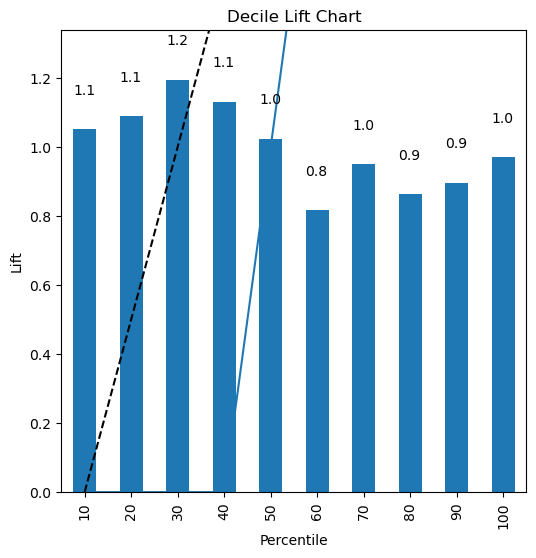

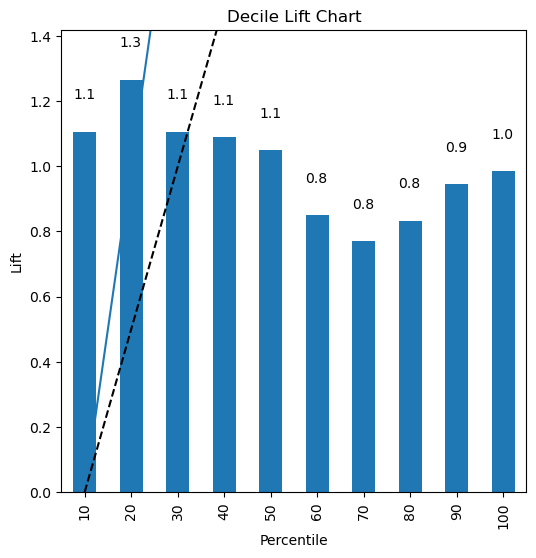

In [31]:
# Create cumulative gains and lift charts for the training set
gainsChart(train_sorted.y, figsize=(6,6))
liftChart(train_sorted.y, figsize=(6,6))

# Create cumulative gains and lift charts for the validation set
gainsChart(val_sorted.y, figsize=(6,6))
liftChart(val_sorted.y, figsize=(6,6))

In [32]:
#net profit for Random forest
# Sort the observations by predicted probability of donation for the training set
train_sorted = pd.DataFrame({'y': y_train, 'y_pred': rf_train_pred, 'net_profit': train_net_profit})
train_sorted = train_sorted.sort_values('y_pred', ascending=False)
train_sorted
# Sort the observations by predicted probability of donation for the validation set
val_sorted = pd.DataFrame({'y': y_test, 'y_pred': rf_test_pred, 'net_profit': val_net_profit})
val_sorted = val_sorted.sort_values('y_pred', ascending=False)
val_sorted



,y,y_pred,net_profit
2951,1,1,-0.001735
3041,0,1,-1.283019
2253,1,1,-0.001735
2914,0,1,-1.283019
1071,0,1,-1.283019
...,...,...,...
2909,1,0,-0.001735
2285,1,0,-0.001735
685,1,0,-0.001735
3080,1,0,-0.001735


<AxesSubplot:title={'center':'Decile Lift Chart'}, xlabel='Percentile', ylabel='Lift'>

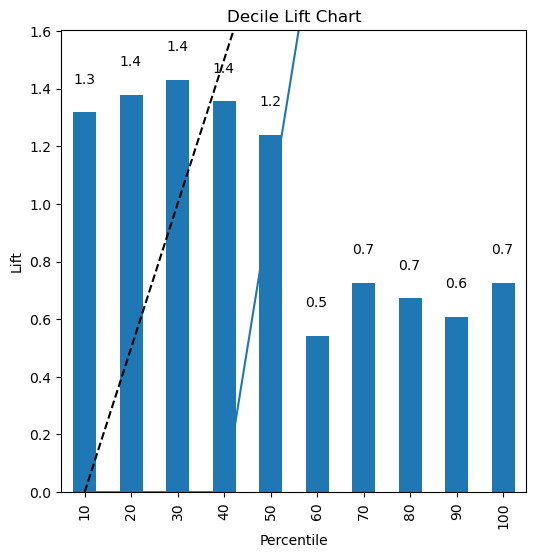

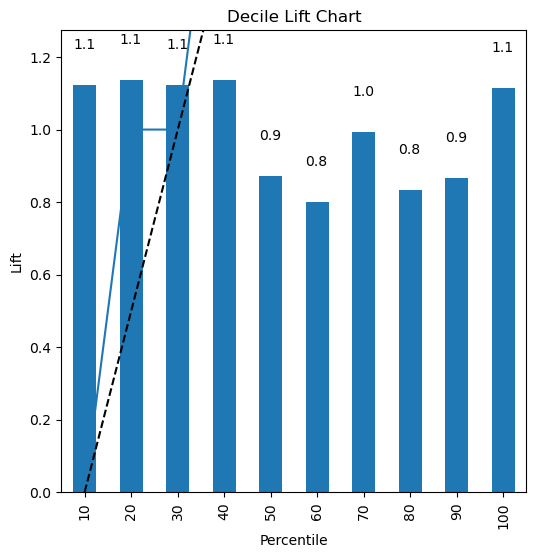

In [33]:
# Create cumulative gains and lift charts for the training set
gainsChart(train_sorted.y, figsize=(6,6))
liftChart(train_sorted.y, figsize=(6,6))

# Create cumulative gains and lift charts for the validation set
gainsChart(val_sorted.y, figsize=(6,6))
liftChart(val_sorted.y, figsize=(6,6))

Based on the estimated net profit calculation, we can select the best model.
The model with the highest cumulative net profit gains is considered the best.
Logistic Regression is best models.

In [34]:
#new dataset
#load new data set
new_df = pd.read_csv(r"C:\Users\anish\Downloads\FutureFundraising.csv")
new_df


,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,3,0,1,0,0,1,1,1,1,...,3,42,92.0,29.0,15.0,17,8,15.333333,NaN,NaN
1,2,4,0,0,1,0,0,1,2,1,...,4,21,30.0,20.0,20.0,33,9,15.000000,NaN,NaN
2,3,5,0,0,0,1,0,1,1,0,...,10,61,220.0,35.0,25.0,31,9,24.444444,NaN,NaN
3,4,1,0,0,0,0,1,1,4,0,...,21,32,41.0,19.0,19.0,31,13,13.666667,NaN,NaN
4,5,4,0,0,1,0,1,1,7,1,...,1,47,46.0,10.0,10.0,28,8,5.750000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2,1,0,0,0,0,1,2,1,...,2,25,40.0,10.0,10.0,29,5,10.000000,NaN,NaN
1996,1997,4,0,0,1,0,1,1,4,1,...,6,16,25.0,25.0,25.0,39,6,25.000000,NaN,NaN
1997,1998,4,0,0,1,0,1,1,5,0,...,14,53,80.0,30.0,25.0,34,12,26.666667,NaN,NaN
1998,1999,5,0,0,0,1,0,1,2,0,...,19,28,47.0,15.0,10.0,30,7,11.750000,NaN,NaN


In [35]:
#dropping a columns
new_df=new_df.drop(columns=['TARGET_D','TARGET_B'])
new_df

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT
0,1,3,0,1,0,0,1,1,1,1,...,470,452,3,42,92.0,29.0,15.0,17,8,15.333333
1,2,4,0,0,1,0,0,1,2,1,...,489,453,4,21,30.0,20.0,20.0,33,9,15.000000
2,3,5,0,0,0,1,0,1,1,0,...,412,376,10,61,220.0,35.0,25.0,31,9,24.444444
3,4,1,0,0,0,0,1,1,4,0,...,263,283,21,32,41.0,19.0,19.0,31,13,13.666667
4,5,4,0,0,1,0,1,1,7,1,...,793,850,1,47,46.0,10.0,10.0,28,8,5.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2,1,0,0,0,0,1,2,1,...,430,422,2,25,40.0,10.0,10.0,29,5,10.000000
1996,1997,4,0,0,1,0,1,1,4,1,...,945,559,6,16,25.0,25.0,25.0,39,6,25.000000
1997,1998,4,0,0,1,0,1,1,5,0,...,346,300,14,53,80.0,30.0,25.0,34,12,26.666667
1998,1999,5,0,0,0,1,0,1,2,0,...,350,291,19,28,47.0,15.0,10.0,30,7,11.750000


In [36]:
#predicting for new  data set
new_predict=logit.predict(new_df)
new_predict

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [37]:
new_df['TARGET_B'] = new_predict

In [38]:
new_df.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B
0,1,3,0,1,0,0,1,1,1,1,...,452,3,42,92.0,29.0,15.0,17,8,15.333333,1
1,2,4,0,0,1,0,0,1,2,1,...,453,4,21,30.0,20.0,20.0,33,9,15.000000,0
2,3,5,0,0,0,1,0,1,1,0,...,376,10,61,220.0,35.0,25.0,31,9,24.444444,0
3,4,1,0,0,0,0,1,1,4,0,...,283,21,32,41.0,19.0,19.0,31,13,13.666667,0
4,5,4,0,0,1,0,1,1,7,1,...,850,1,47,46.0,10.0,10.0,28,8,5.750000,1
